In [1]:
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
zipref = zipfile.ZipFile("glasses_dataset.zip")
zipref.extractall()
zipref.close()

In [4]:
train_dir = "train"
valid_dir = "validate"
IMG_SIZE = (224,224)

In [21]:
train_gen = ImageDataGenerator(rescale=1/255.,
                               rotation_range=10,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.4,
                               horizontal_flip=True)

valid_gen = ImageDataGenerator(rescale=1/255.)

train_data = train_gen.flow_from_directory(directory="train",
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='binary',
                                           target_size=(224,224))

valid_data = valid_gen.flow_from_directory(directory='train',
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='binary',
                                           target_size=(224,224))


Found 104 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [22]:
image, labels = train_data.next()

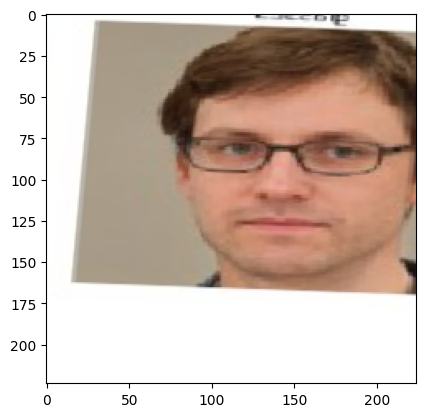

In [23]:
import matplotlib.pyplot as plt
import random
indx = random.randint(0, len(image)-1)
plt.imshow(image[indx])

In [27]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras import Sequential

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_1 = model.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
4/4 [==============================] - 4s 455ms/step - loss: 0.7483 - accuracy: 0.4904 - val_loss: 0.7391 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 1s 351ms/step - loss: 0.7345 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 2s 508ms/step - loss: 0.6959 - accuracy: 0.4615 - val_loss: 0.6876 - val_accuracy: 0.5577
Epoch 4/10
4/4 [==============================] - 1s 342ms/step - loss: 0.6760 - accuracy: 0.5769 - val_loss: 0.6671 - val_accuracy: 0.6635
Epoch 5/10
4/4 [==============================] - 2s 466ms/step - loss: 0.7011 - accuracy: 0.5288 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 2s 496ms/step - loss: 0.6936 - accuracy: 0.4808 - val_loss: 0.6860 - val_accuracy: 0.5481
Epoch 7/10
4/4 [==============================] - 2s 386ms/step - loss: 0.6936 - accuracy: 0.4615 - val_loss: 0.6806 - val_accuracy: 0.6538
Epoch 8/10
4/4 [====